# Distribution of fragment length

NanoStrand-seq can generate longer reads than Strand-seq. 

In this notebook, we analysis the fragment length (mapped region, excluded linker sequences) of all cells from one flow-cell.

In [1]:
import glob
import gzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
run = "20220708_GM12878"

lengths = []
for path in glob.glob("../../1_NanoStrandSeq/results/stat/lengths/%s/*.tsv.gz" % run):
    with gzip.open(path, "rt") as f:
        for i, line in enumerate(f):
            if i == 0:
                continue
            name, length = line.strip("\n").split("\t")
            lengths.append(int(length))
lengths.sort()

In [8]:
print("No.\tIndex\tLength")
print("-" * 30)
for i in np.arange(0, 1, 0.1):
    n = int(len(lengths) * i)
    v = lengths[n]
    print(round(i, 1), n, v, sep="\t")
    if i == 0.9:
        v90 = v

No.	Index	Length
------------------------------
0.0	0	98
0.1	991782	1359
0.2	1983565	1591
0.3	2975348	1825
0.4	3967131	2077
0.5	4958914	2361
0.6	5950697	2701
0.7	6942480	3134
0.8	7934263	3749
0.9	8926046	4829


In [9]:
print("Mean of top 10%:", np.mean(lengths[-int(len(lengths) * 0.1):]))
print("Median of top 10%:", np.median(lengths[-int(len(lengths) * 0.1):]))

Mean of top 10%: 6334.868107104182
Median of top 10%: 5909.0


In [10]:
s1 = sum(lengths) / 2
s2 = 0
n50 = 0
for v in lengths:
    s2 += v
    if s2 >= s1:
        n50 = v
        break
print("N50:", n50)

N50: 3134


In [11]:
maxlen = 6000
wbin = 100
nbin = int(maxlen / wbin)
xs = np.arange(nbin) * wbin + wbin / 2
ys = np.zeros(nbin)
for v in lengths:
    i = int(v/wbin)
    if i < nbin:
        ys[i] += 1
ys = ys / max(ys)
mean = np.mean(lengths)
median = np.median(lengths)
print("Mean:", mean)
print("Median:", median)

Mean: 2794.8831794740563
Median: 2361.0


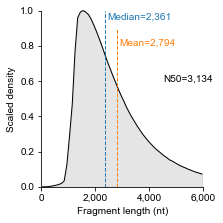

In [12]:
plt.figure(figsize=(3.2, 3.2))
plt.plot(xs, ys, color="black", clip_on=False, lw=1)
plt.gca().fill_between(xs, ys, 0, alpha=0.1, color="black", clip_on=False)
plt.plot([mean, mean], [0, 0.9], ls="--", lw=1, color="C1")
plt.text(mean + 100, 0.8, "Mean=%s" % format(int(mean), ","), color="C1", rotation=0)
plt.plot([median, median], [0, 1], ls="--", lw=1, color="C0")
plt.text(median + 100, 0.95, "Median=%s" % format(int(median), ","), color="C0")
plt.text(4500, 0.6, "N50=%s" % format(n50, ","))
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
xs1 = np.arange(0, maxlen + 1, 2000)
plt.xticks(xs1, [format(x, ",") for x in xs1])
plt.xlim(0, maxlen)
plt.ylim(0, 1)
plt.xlabel("Fragment length (nt)")
plt.ylabel("Scaled density")
plt.tight_layout()
plt.savefig("figures/mapped_length_distribution.%s.pdf" % run, dpi=300)